In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Bandit_Problem(object):
    def __init__(self, TrueActionValues, epsilon, totalSteps):
        self.armNumber = np.size(TrueActionValues)
        self.epsilon = epsilon
        self.currentStep = 0
        self.howMAnyTimesEachArmHasBeenPulled = np.zeros(self.armNumber)
        self.totalSteps = totalSteps
        self.TrueActionValues = TrueActionValues
        self.armMeanRewards = np.zeros(self.armNumber)
        self.currentReward = 0
        self.meanReward = np.zeros(totalSteps+1)
        
    def SelectActions(self):
        ProbabiltyDraw = np.random.rand()

        if(self.currentStep == 0) or (ProbabiltyDraw <= self.epsilon):
            SelectedArmIndex = np.random.choice(self.armNumber)

        if(ProbabiltyDraw > self.epsilon):
            SelectedArmIndex = np.argmax(self.armMeanRewards)
        
        self.currentStep += 1

        self.howMAnyTimesEachArmHasBeenPulled[SelectedArmIndex] += 1

        self.currentReward = np.random.normal(self.TrueActionValues[SelectedArmIndex], 2)

        self.meanReward[self.currentStep] = self.meanReward[self.currentStep-1] + (self.currentReward - self.meanReward[self.currentStep-1])/self.currentStep

        self.armMeanRewards[SelectedArmIndex] = self.armMeanRewards[SelectedArmIndex] + (self.currentReward - self.armMeanRewards[SelectedArmIndex])/self.howMAnyTimesEachArmHasBeenPulled[SelectedArmIndex]

    def PlayGame(self):
        for i in range(self.totalSteps):
            self.SelectActions()

    def ClearAll(self):
        self.currentStep = 0
        self.howMAnyTimesEachArmHasBeenPulled = np.zeros(self.armNumber)
        self.armMeanRewards = np.zeros(self.armNumber)
        self.currentReward = 0
        self.meanReward = np.zeros(self.totalSteps+1)

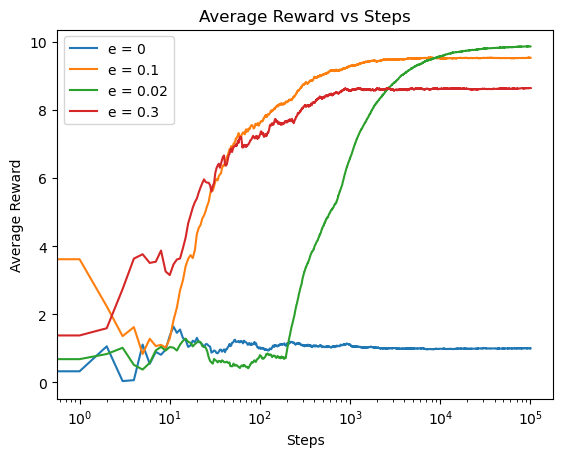

In [3]:
actionValues = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

e1 = 0
e2 = 0.1
e3 = 0.02
e4 = 0.3

totalSteps = 100000

Bandit1 = Bandit_Problem(actionValues, e1, totalSteps)
Bandit1.PlayGame()
Bandit2 = Bandit_Problem(actionValues, e2, totalSteps)
Bandit2.PlayGame()
Bandit3 = Bandit_Problem(actionValues, e3, totalSteps)
Bandit3.PlayGame()
Bandit4 = Bandit_Problem(actionValues, e4, totalSteps)
Bandit4.PlayGame()

plt.plot(np.arange(totalSteps+1),Bandit1.meanReward, label = f'e = {e1}')
plt.plot(np.arange(totalSteps+1),Bandit2.meanReward, label = f'e = {e2}')
plt.plot(np.arange(totalSteps+1),Bandit3.meanReward, label = f'e = {e3}')
plt.plot(np.arange(totalSteps+1),Bandit4.meanReward, label = f'e = {e4}')
plt.xscale('log')
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Steps')
plt.legend()
plt.show()


